# **Music Recommendation Based on Emotion Engine**

## Building a recommendation based on image captured by the user

### This recommendation will be based on 3 emotions(Happy, Sad, and Neutral).

## The dataset used for the music recommended is gotten from Kaggle. It is a folder that contains 5 different datasets and I have chosen the one that best suit the problem.

# **Emotion Detector**

## Import required modules

In [50]:
pip install deepface

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: deepface in c:\users\hp\appdata\local\programs\python\python39\lib\site-packages (0.0.79)


In [51]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from deepface import DeepFace

## Create a function that allows the user that pictures and use deepface ***(already available model)*** to detect the emotion of the user.

### For the training, we will be using image uploaded but during deploying ⬇

### The image captured will be saved as a file in the same directory as the model to be used and discarded/replaced when another image is taken

In [52]:
# index = 0
# def picture_emotion(image):
#     img_name = cv2.imread(image)
#     plt.imshow(img_name[:,:,::-1])
#     demography = DeepFace.analyze(img_name, actions = ['emotion'], enforce_detection=False, detector_backend='retinaface')
#     return demography

# emotion = picture_emotion(image = r'/content/image (1).jpg')
# dominant_emotion = emotion[index]['dominant_emotion']
# print("Dominant Emotion: ",dominant_emotion)
from emotiondetect import *

dominant_emotion = emotion()

Escape hit, closing...


Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  1.18it/s]

neutral


# Load the dataset that will be used in recommending music for the user

In [53]:
# from google.colab import drive
# drive.mount('/content/drive')

In [54]:
import pandas as pd

In [55]:
music_data = pd.read_csv('data.csv', low_memory=False)
music_data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# **Data Munging/Preparation**

## Check the shape and info of the dataset

In [56]:
music_data.shape

(170653, 19)

In [57]:
music_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

### The dataset contains information about different songs and their attributes such as genres, artists, acousticness, danceability, duration, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, key, mode, and count. The 'valence' attribute measures the musical positiveness conveyed by a track. It is important for our problem solution as it can be used as a factor in determining which songs to recommend to a user based on their emotions.

## convert the music duration from milliseconds to minutes then rename the column to minutes

In [58]:
music_data['duration_ms'] = music_data['duration_ms'].div(60000).round(decimals=2)

In [59]:
music_data = music_data.rename(columns={'duration_ms':'duration_min'})

In [60]:
music_data.head()

,valence,year,acousticness,artists,danceability,duration_min,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,13.86,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,3.01,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,8.33,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,3.50,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,2.78,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


### Check for missing, null, and duplicate data.

In [61]:
music_data.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_min        0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [62]:
music_data.duplicated().sum()

0

In [63]:
music_data.duplicated().value_counts()

False    170653
dtype: int64

## Make the ID the unique identifier, clean the artist column, and make the artist name and the name of the song be side by side. This will allow the data to be readable and neat

In [64]:
df = music_data.set_index('id')
df.head()

,valence,year,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
id,,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,13.86,0.211,0,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,0.9630,1921,0.732,['Dennis Day'],0.819,3.01,0.341,0,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
1o6I8BglA6ylDMrIELygv1,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,8.33,0.166,0,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3ftBPsC5vPBKxYSee08FDH,0.1650,1921,0.967,['Frank Parker'],0.275,3.50,0.309,0,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4d6HGyGT8e121BsdKmw9v6,0.2530,1921,0.957,['Phil Regan'],0.418,2.78,0.193,0,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [65]:
df['artists'] = df['artists'].str.strip("[]'")
df.head(2)

,valence,year,acousticness,artists,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
id,,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,0.0594,1921,0.982,"Sergei Rachmaninoff', 'James Levine', 'Berline...",0.279,13.86,0.211,0,0.878,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,0.9630,1921,0.732,Dennis Day,0.819,3.01,0.341,0,0.000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936


In [66]:
name = df.pop('name')
artist = df.pop('artists')

df.insert(0, 'name', name)
df.insert(1, 'artist', artist)

## Drop unnecesary columns

In [67]:
df.drop('release_date', axis=1)

,name,artist,valence,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
id,,,,,,,,,,,,,,,,,
4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff', 'James Levine', 'Berline...",0.0594,1921,0.98200,0.279,13.86,0.211,0,0.878000,10,0.6650,-20.096,1,4,0.0366,80.954
7xPhfUan2yNtyFG0cUWkt8,Clancy Lowered the Boom,Dennis Day,0.9630,1921,0.73200,0.819,3.01,0.341,0,0.000000,7,0.1600,-12.441,1,5,0.4150,60.936
1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.0394,1921,0.96100,0.328,8.33,0.166,0,0.913000,3,0.1010,-14.850,1,5,0.0339,110.339
3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,0.1650,1921,0.96700,0.275,3.50,0.309,0,0.000028,5,0.3810,-9.316,1,3,0.0354,100.109
4d6HGyGT8e121BsdKmw9v6,When Irish Eyes Are Smiling,Phil Regan,0.2530,1921,0.95700,0.418,2.78,0.193,0,0.000002,3,0.2290,-10.096,1,2,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0KkIkfsLEJbrcIhYsCL7L5,China,"Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna',...",0.6080,2020,0.08460,0.786,5.03,0.808,0,0.000289,7,0.0822,-3.702,1,72,0.0881,105.029
0OStKKAuXlxA0fMH54Qs6E,Halloweenie III: Seven Days,Ashnikko,0.7340,2020,0.20600,0.717,2.51,0.753,0,0.000000,7,0.1010,-6.020,1,68,0.0605,137.936
4BZXVFYCb76Q0Klojq4piV,AYA,MAMAMOO,0.6370,2020,0.10100,0.634,3.52,0.858,0,0.000009,4,0.2580,-2.226,0,76,0.0809,91.688


### Data correlation

In [68]:
corr = df.corr()
corr

,valence,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
valence,1.000000,-0.028245,-0.184101,0.558946,-0.191805,0.353876,-0.018613,-0.198501,0.028473,0.003832,0.313512,0.015641,0.014200,0.046381,0.171689
year,-0.028245,1.000000,-0.614250,0.188515,0.079716,0.530272,0.220881,-0.272371,0.007540,-0.057318,0.487697,-0.032385,0.862442,-0.167816,0.141048
acousticness,-0.184101,-0.614250,1.000000,-0.266852,-0.076373,-0.749393,-0.246007,0.329819,-0.020550,-0.024482,-0.561696,0.047168,-0.573162,-0.043980,-0.207120
danceability,0.558946,0.188515,-0.266852,1.000000,-0.139939,0.221967,0.241757,-0.278063,0.024439,-0.100193,0.285057,-0.045956,0.199606,0.235491,0.001801
duration_min,-0.191805,0.079716,-0.076373,-0.139939,1.000000,0.042124,-0.048882,0.084769,-0.004266,0.047163,-0.003033,-0.046083,0.059602,-0.084608,-0.025468
energy,0.353876,0.530272,-0.749393,0.221967,0.042124,1.000000,0.132723,-0.281101,0.027705,0.126192,0.782362,-0.039260,0.485005,-0.070555,0.250865
explicit,-0.018613,0.220881,-0.246007,0.241757,-0.048882,0.132723,1.000000,-0.140987,0.005432,0.039640,0.140300,-0.078872,0.191543,0.414070,0.011969
instrumentalness,-0.198501,-0.272371,0.329819,-0.278063,0.084769,-0.281101,-0.140987,1.000000,-0.014591,-0.047193,-0.408611,-0.036543,-0.296750,-0.121700,-0.105361
key,0.028473,0.007540,-0.020550,0.024439,-0.004266,0.027705,0.005432,-0.014591,1.000000,0.000205,0.017385,-0.116260,0.007826,0.023784,0.002629
liveness,0.003832,-0.057318,-0.024482,-0.100193,0.047163,0.126192,0.039640,-0.047193,0.000205,1.000000,0.056422,0.002641,-0.076464,0.134667,0.007714


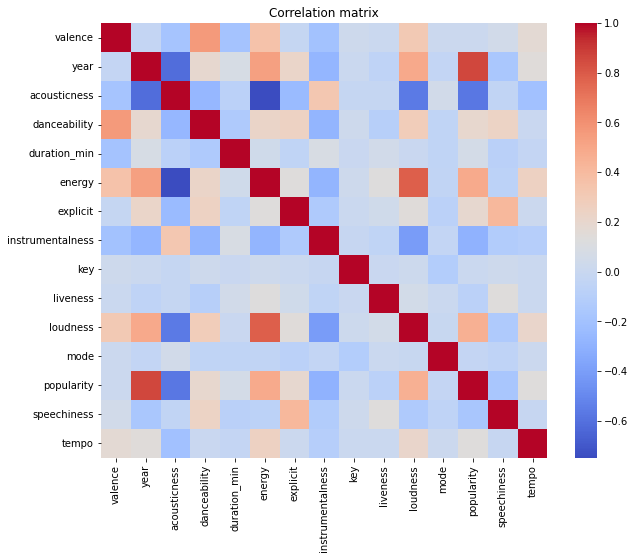

In [69]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [70]:
corr_with_target = corr['valence'].sort_values(ascending=False)
corr_with_target

valence             1.000000
danceability        0.558946
energy              0.353876
loudness            0.313512
tempo               0.171689
speechiness         0.046381
key                 0.028473
mode                0.015641
popularity          0.014200
liveness            0.003832
explicit           -0.018613
year               -0.028245
acousticness       -0.184101
duration_min       -0.191805
instrumentalness   -0.198501
Name: valence, dtype: float64

In [71]:
corr_with_target = corr['energy'].sort_values(ascending=False)
corr_with_target

energy              1.000000
loudness            0.782362
year                0.530272
popularity          0.485005
valence             0.353876
tempo               0.250865
danceability        0.221967
explicit            0.132723
liveness            0.126192
duration_min        0.042124
key                 0.027705
mode               -0.039260
speechiness        -0.070555
instrumentalness   -0.281101
acousticness       -0.749393
Name: energy, dtype: float64

## Clustering

* Choose the features that will be used for clustering of the songs
* Normalize the data

In [72]:
from sklearn.preprocessing import  MinMaxScaler

# Choose the relevant features for clustering
features = ['danceability', 'energy', 'valence', 'loudness', 'tempo', 'speechiness']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(df[features])


## Using KMeans

In [73]:
from sklearn.cluster import KMeans

# Initialize KMeans object with number of clusters and initialization method
kmeans = KMeans(n_clusters=50, init='k-means++', random_state=42, max_iter=500)

# Fit KMeans model to the data
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add a new column to the dataframe with the cluster labels
df['cluster_label'] = cluster_labels



In [74]:
df['cluster_label'].value_counts().to_frame()

,cluster_label
5,5124
44,5095
21,5070
1,5049
27,5047
6,4771
2,4708
3,4681
11,4568
18,4398


## Data Visualization

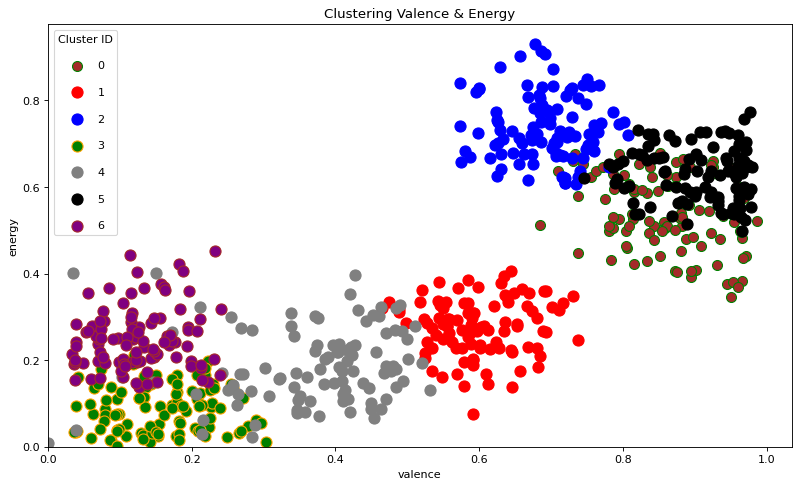

In [75]:
import random

# Set random seed for reproducibility
random.seed(50)

first_cluster = df[df['cluster_label'] == 0].sample(100)
second_cluster  = df[df['cluster_label'] == 1].sample(100)
third_cluster = df[df['cluster_label'] == 2].sample(100)
fourth_cluster = df[df['cluster_label'] == 3].sample(100)
fifth_cluster = df[df['cluster_label'] == 4].sample(100)
sixth_cluster = df[df['cluster_label'] == 5].sample(100)
seventh_cluster = df[df['cluster_label'] == 6].sample(100)



# Plot clustering result
# Plot Clustering Result
fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
plt.scatter(first_cluster.valence[first_cluster.cluster_label == 0], first_cluster['energy'][first_cluster.cluster_label == 0],color = 'brown', s=80, edgecolor = 'green', label= '0')
plt.scatter(second_cluster.valence[second_cluster.cluster_label == 1], second_cluster['energy'][second_cluster.cluster_label == 1], color = 'red', s=100, edgecolor = 'red', label = '1')
plt.scatter(third_cluster.valence[third_cluster.cluster_label == 2], third_cluster['energy'][third_cluster.cluster_label == 2], color = 'blue', s=100, edgecolor = 'blue', label = '2')
plt.scatter(fourth_cluster.valence[fourth_cluster.cluster_label == 3], fourth_cluster['energy'][fourth_cluster.cluster_label == 3], color = 'green', s=100, edgecolor = 'orange', label = '3')
plt.scatter(fifth_cluster.valence[fifth_cluster.cluster_label == 4], fifth_cluster['energy'][fifth_cluster.cluster_label== 4], color = 'grey', s=100, edgecolor = 'grey', label = '4')
plt.scatter(sixth_cluster.valence[sixth_cluster.cluster_label == 5], sixth_cluster['energy'][sixth_cluster.cluster_label == 5], color = 'black', s=100, edgecolor = 'black', label = '5')
plt.scatter(seventh_cluster.valence[seventh_cluster.cluster_label == 6], seventh_cluster['energy'][seventh_cluster.cluster_label == 6], color = 'purple', s=100, edgecolor = 'brown', label = '6')

plt.legend(title= "Cluster ID", labelspacing=1.5)
plt.xlabel('valence')
plt.ylabel('energy')
ax.set_ylim(ymin=0)
ax.set_xlim(xmin=0)
plt.title("Clustering Valence & Energy")
plt.savefig('cluster_result.png')
plt.show()



## Using DBScan

In [76]:
# from sklearn.cluster import OPTICS
# from sklearn.cluster import DBSCAN

# # Perform DBSCAN clustering
# # dbscan = OPTICS(eps=0.2, min_samples=40)
# dbscan = DBSCAN(eps=0.3, min_samples=1000, algorithm='ball_tree')

In [77]:
# dbscan.fit(X)
# df['Cluster'] = dbscan.labels_

In [78]:
# df['Cluster'].value_counts().to_frame()

In [79]:
# random.seed(50)
# first_cluster = df[df['Cluster'] == 0].sample(100)
# second_cluster  = df[df['Cluster'] == 1].sample(100)
# third_cluster = df[df['Cluster'] == 2].sample(100)
# fourth_cluster = df[df['Cluster'] == 3].sample(50)
# fifth_cluster = df[df['Cluster'] == 4].sample(50)
# sixth_cluster = df[df['Cluster'] == 5]
# seventh_cluster = df[df['Cluster'] == 6]


In [80]:
# # Plot Clustering Result
# fig, ax = plt.subplots(figsize=(12, 7), dpi=80)
# plt.scatter(first_cluster.valence[first_cluster.Cluster == 0], first_cluster['energy'][first_cluster.Cluster == 0],color = 'brown', s=80, edgecolor = 'green', label= '0')
# plt.scatter(second_cluster.valence[second_cluster.Cluster == 1], second_cluster['energy'][second_cluster.Cluster == 1], color = 'red', s=100, edgecolor = 'red', label = '1')
# plt.scatter(third_cluster.valence[third_cluster.Cluster == 2], third_cluster['energy'][third_cluster.Cluster == 2], color = 'blue', s=100, edgecolor = 'blue', label = '2')
# plt.scatter(fourth_cluster.valence[fourth_cluster.Cluster == 3], fourth_cluster['energy'][fourth_cluster.Cluster == 3], color = 'green', s=100, edgecolor = 'orange', label = '3')
# plt.scatter(fifth_cluster.valence[fifth_cluster.Cluster == 4], fifth_cluster['energy'][fifth_cluster.Cluster == 4], color = 'grey', s=100, edgecolor = 'grey', label = '4')
# plt.scatter(sixth_cluster.valence[sixth_cluster.Cluster == 5], sixth_cluster['energy'][sixth_cluster.Cluster == 5], color = 'black', s=100, edgecolor = 'black', label = '5')
# plt.scatter(seventh_cluster.valence[seventh_cluster.Cluster == 6], seventh_cluster['energy'][seventh_cluster.Cluster == 6], color = 'purple', s=100, edgecolor = 'brown', label = '6')

# plt.legend(title= "Cluster ID", labelspacing=1.5)
# plt.xlabel('valence')
# plt.ylabel('energy')
# ax.set_ylim(ymin=0)
# ax.set_xlim(xmin=0)
# plt.title("Clustering Valence & Energy")
# plt.savefig('cluster_result.png')
# plt.show()

In [81]:
sad_dataset = df[df['cluster_label'] == 6].reset_index()
happy_dataset = df[df['cluster_label'] == 5].reset_index()
neutral_dataset = df[df['cluster_label'] == 1].reset_index()

In [82]:
neutral_dataset.head()

,id,name,artist,valence,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster_label
0,0POO8XaUgW5Qjbv9sbDy8W,Rákóczy March,"Hector Berlioz', 'Arturo Toscanini",0.664,1921,0.996,0.541,4.18,0.283,0,0.898000,9,0.393,-14.808,1,0,1921,0.0477,108.986,1
1,0IA0Hju8CAgYfV1hwhidBH,La Java,Mistinguett,0.654,1922,0.993,0.563,2.69,0.184,0,0.000016,4,0.325,-13.757,1,0,1922,0.0512,133.088,1
2,1FnTOwM5cW5N9wzCWziLKC,La Ronde De Nuit,Perchicot,0.568,1922,0.992,0.550,2.96,0.310,0,0.000000,10,0.204,-15.423,0,0,1922,0.1680,125.829,1
3,63IcPgVIW0PWeJTaIY7GCu,Le Petit Amant,Jeanne Saint Bonnet,0.670,1922,0.996,0.656,2.01,0.283,0,0.005970,4,0.155,-14.113,1,0,1922,0.1910,126.085,1
4,7p94hrYktZStgIu6TCj3cZ,Antoine,Fortugé,0.558,1922,0.994,0.537,2.75,0.153,0,0.000000,8,0.419,-15.217,1,0,1922,0.0898,129.134,1


In [83]:
happy_dataset.head()

,id,name,artist,valence,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster_label
0,7mjBXTOlhlaxX3qZDLfX6G,I'm Gonna Meet My Sweetie Now,"Jean Goldkette and his Orchestra', 'Bix Beider...",0.968,1924,0.981,0.741,2.72,0.535,0,0.7650,1,0.1520,-9.173,0,2,1924,0.0411,118.205,5
1,1Znnilxi9JGrqarvVHAgy3,Breakaway,The Travelers,0.855,1925,0.959,0.934,2.83,0.609,0,0.8890,2,0.0966,-9.479,1,4,1925,0.0636,107.321,5
2,3Da0rFSGowkOPtcugvxKp5,Bugle Call Rag - 78 rpm Version,Ed Lang & His Orchestra,0.895,1925,0.846,0.823,2.98,0.613,0,0.8860,10,0.0534,-9.062,1,5,1925,0.0674,114.038,5
3,3SBEbhHjV4zwqjqaj2Bab4,Chizzlin' Sam,"""Clarence Williams' Jug Band""",0.893,1925,0.972,0.740,3.12,0.604,0,0.0719,5,0.0395,-10.616,1,2,1925,0.1230,123.043,5
4,61zSM8kaKDEhXev6AHPB8r,Jimtown Blues,Tommy Dorsey,0.882,1925,0.801,0.841,3.89,0.694,0,0.7290,10,0.0386,-9.603,1,2,1925,0.0988,106.237,5


In [84]:
sad_dataset.head()

,id,name,artist,valence,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster_label
0,4BJqT0PrAfrxzMOxytFOIz,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","Sergei Rachmaninoff', 'James Levine', 'Berline...",0.0594,1921,0.982,0.279,13.86,0.211,0,0.878000,10,0.665,-20.096,1,4,1921,0.0366,80.954,6
1,1o6I8BglA6ylDMrIELygv1,Gati Bali,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.0394,1921,0.961,0.328,8.33,0.166,0,0.913000,3,0.101,-14.850,1,5,1921,0.0339,110.339,6
2,3ftBPsC5vPBKxYSee08FDH,Danny Boy,Frank Parker,0.1650,1921,0.967,0.275,3.50,0.309,0,0.000028,5,0.381,-9.316,1,3,1921,0.0354,100.109,6
3,0Nk5f07H3JaEunGrYfbqHM,Come Back To Erin,Phil Regan,0.2180,1921,0.957,0.259,3.11,0.212,0,0.000222,2,0.236,-13.300,1,1,1921,0.0358,85.726,6
4,1OicZEUVSwpiAosSQm16D8,Gati Main-main,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.0608,1921,0.975,0.370,6.68,0.196,0,0.945000,4,0.143,-15.531,1,1,1921,0.0449,116.650,6


In [85]:
#The below function is to get the dataset when an emotion is detected.
def get_data():
    # Check if dominant emotion is happy
    if dominant_emotion == 'happy':
        # Return happy dataset if emotion is happy
        return happy_dataset
    
    # Check if dominant emotion is sad
    elif dominant_emotion == "sad":
        # Return sad dataset if emotion is sad
        return sad_dataset
    
    # If dominant emotion is neutral or not detected
    else:
        # Return neutral dataset as default
        return neutral_dataset

In [86]:
get_data()

,id,name,artist,valence,year,acousticness,danceability,duration_min,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,release_date,speechiness,tempo,cluster_label
0,0POO8XaUgW5Qjbv9sbDy8W,Rákóczy March,"Hector Berlioz', 'Arturo Toscanini",0.664,1921,0.996,0.541,4.18,0.283,0,0.898000,9,0.3930,-14.808,1,0,1921,0.0477,108.986,1
1,0IA0Hju8CAgYfV1hwhidBH,La Java,Mistinguett,0.654,1922,0.993,0.563,2.69,0.184,0,0.000016,4,0.3250,-13.757,1,0,1922,0.0512,133.088,1
2,1FnTOwM5cW5N9wzCWziLKC,La Ronde De Nuit,Perchicot,0.568,1922,0.992,0.550,2.96,0.310,0,0.000000,10,0.2040,-15.423,0,0,1922,0.1680,125.829,1
3,63IcPgVIW0PWeJTaIY7GCu,Le Petit Amant,Jeanne Saint Bonnet,0.670,1922,0.996,0.656,2.01,0.283,0,0.005970,4,0.1550,-14.113,1,0,1922,0.1910,126.085,1
4,7p94hrYktZStgIu6TCj3cZ,Antoine,Fortugé,0.558,1922,0.994,0.537,2.75,0.153,0,0.000000,8,0.4190,-15.217,1,0,1922,0.0898,129.134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5044,5rBQIzDduJsmDbZ97gqWEW,sand castles,Fujitsu,0.630,2018,0.576,0.784,2.46,0.312,0,0.851000,4,0.1280,-14.648,0,61,2018-09-21,0.0513,129.940,1
5045,7JEUg9KqmpdIE5Nbb9ss66,Love You Anymore,Michael Bublé,0.603,2018,0.869,0.693,3.04,0.257,0,0.000000,6,0.1100,-7.785,1,68,2018-11-16,0.0356,90.012,1
5046,7LZ8mtSwAwgAopE8cCjeGw,Videos y Fotos,Esteban Gabriel,0.552,2019,0.292,0.623,3.68,0.350,0,0.000000,1,0.0900,-8.260,0,58,2019-10-25,0.0285,130.486,1
5047,2Q1s11otlyEtj80OgsqDFz,Internet Ruined Me,Wilbur Soot,0.568,2020,0.724,0.726,4.26,0.371,0,0.002990,9,0.1320,-14.008,1,67,2020-05-25,0.0623,160.240,1


In [87]:
# Initialize empty lists for songs of different moods
sad_songs = []
happy_songs = []
other_songs = []

# Create a list of the three mood-specific lists
list_of_lists = [sad_songs, happy_songs, other_songs]

# Initialize a counter variable
point = 0

# Function to create a list of songs of a particular mood
def create_list(mood, data=get_data()):
    global point
    
    # Loop through the rows of the dataset
    for row in data.itertuples():
        # If mood is happy, add a random happy song to the happy list
        if mood == 'happy':
            sample_song = data.sample()
            happy_songs.append(sample_song['name'].to_string(index=False))
            point = point + 1
            if point == 5:
                break
                
        # If mood is sad, add a random sad song to the sad list
        elif mood == 'sad':
            sample_song = data.sample()
            sad_songs.append(sample_song['name'].to_string(index=False))
            point = point + 1
            if point == 5:
                break
                    
        # If mood is neither happy nor sad, add a random song to the other list
        else:
            sample_song = data.sample()
            other_songs.append(sample_song['name'].to_string(index=False))
            point = point + 1
            if point == 5:
                break
                        
    return


In [88]:
create_list(dominant_emotion)

In [89]:
list_of_lists

[[],
 [],
 ['Have You Met Miss Jones?',
  'Chandan Sa Badan Chanchal Chitwan - Male Vocals',
  "I Won't Dance",
  'Libre de Pecado',
  'Blues']]

## Content Recommendation model using cosine similarity.

By incorporating content-based recommendations in addition to emotion-based recommendations, the music recommendation system can provide a more comprehensive and accurate recommendation to users. It can also help to diversify the recommended songs and introduce users to new songs that they may not have discovered otherwise.

In [90]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize a CountVectorizer object
vectorizer = CountVectorizer()

# Use the fit() method to train the vectorizer on the data obtained from get_data() function
# and store it in the vectorizer variable
vectorizer = vectorizer.fit(get_data())

# Print the vectorizer object
print(vectorizer)


CountVectorizer()


In [91]:
from sklearn.metrics.pairwise import cosine_similarity

# function to calculate similarities between input song and all other songs in the dataset
#This function is to get the similarity of the input songs with other songs in the dataset
def get_similarities(name,data):
    # Getting vector for the input song.
    text_array1 = vectorizer.transform(data[data['name']==name]).toarray()
    num_array1 = data[data['name']==name].select_dtypes(include=np.number).to_numpy()
    
    # We will store similarity for each row of the dataset.
    sim = []
    for idx, row in data.iterrows():
        song_name = row['name']
        
        # Getting vector for current song.
        text_array2 = vectorizer.transform(data[data['name']==song_name]).toarray()
        num_array2 = data[data['name']==song_name].select_dtypes(include=np.number).to_numpy()
        
        # Calculating similarities for text as well as numeric features
        text_sim = cosine_similarity(text_array1, text_array2)[0][0]
        num_sim = cosine_similarity(num_array1, num_array2)[0][0]
        sim.append(text_sim + num_sim)
        
               
        
    return sim


In [92]:
# This function recommends songs based on the similarity factor and popularity
def recommend_songs(name, data):
    # Calculate similarity factor
    data['similarity_factor'] = get_similarities(name, data)
    
    # Sort by similarity factor and release date in descending order
    data.sort_values(by=['similarity_factor', 'release_date'], ascending=[False, False], inplace=True)
    
    # Remove duplicates of the input song
    data.drop_duplicates(subset=['name'], inplace=True)
    
    # The first song will be the input song itself as the similarity will be highest
    data.reset_index(drop=True, inplace=True)
    
    # Return top 10 recommended songs
    recommended_songs = data[['name', 'artist', 'year']][0:10]
    
    # Align the columns to the left
    recommended_songs = recommended_songs.style.set_properties(**{'text-align': 'left'})
    
    return recommended_songs


In [93]:
# This function recommends 10 songs similar to a random song chosen from a list of sad, happy, and other songs.
def final_recommendation(data=get_data()):
    # Iterate over the list of song moods and choose a random song from each list
    for mood_list in list_of_lists:
        if len(mood_list) != 0:
            song_choice = random.choice(mood_list)
            print('The recommended song based on your mood is',song_choice)
            
            # Recommend 10 songs similar to the chosen song
            recommended_songs = recommend_songs(song_choice, data)
            
    return recommended_songs


In [94]:
final_recommendation()

The recommended song based on your mood is Libre de Pecado


,name,artist,year
0,Libre de Pecado,Alberto Beltran,1951
1,Como Te Quiero - Remasterizado,"Francisco Canaro', 'Roberto Maida",1936
2,14 y Se Fue la Vieja - Remasterizado,"Francisco Canaro', 'Roberto Maida",1937
3,Seara,Titi Botez,1939
4,Bhai Ham Pardesi Log,Anil Biswas,1939
5,Jhoota Hai Pyar Koi Mano Na Mano,"Rajkumari', 'Sheela', 'Paresh Banerjee",1944
6,Pran Tyag Kar Tune Diwani,Mohammed Rafi,1946
7,Ab Raat Gai Hai Beet Re,Surendra,1949
8,¡Viva la Patria! - Remasterizado,"Francisco Canaro', 'Charlo",1928
9,Horizontes - Remasterizado,"Francisco Canaro', 'Roberto Maida",1936
